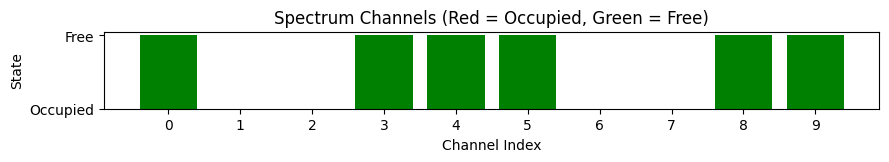

Step: 1, Action: 9, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 9}


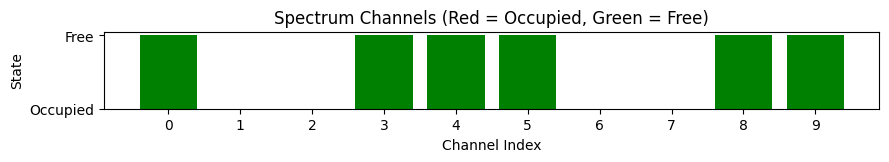

Step: 2, Action: 6, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 8}


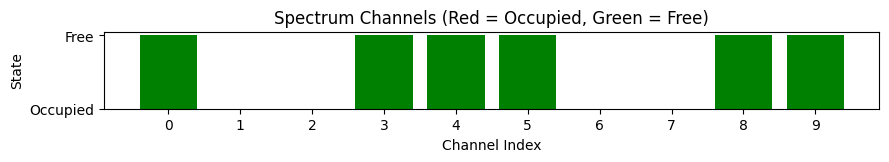

Step: 3, Action: 4, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 7}


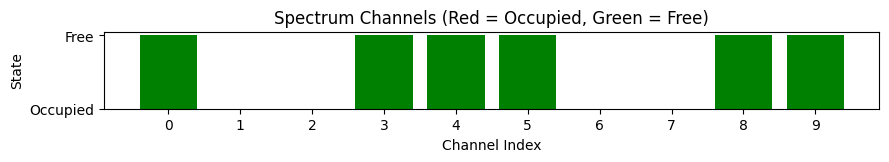

Step: 4, Action: 7, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 6}


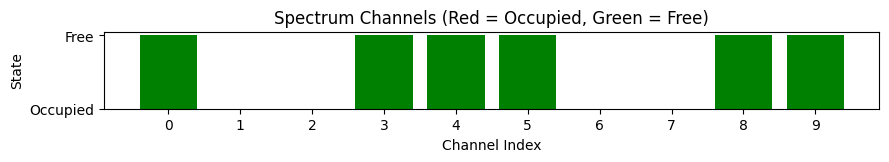

Step: 5, Action: 0, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 5}


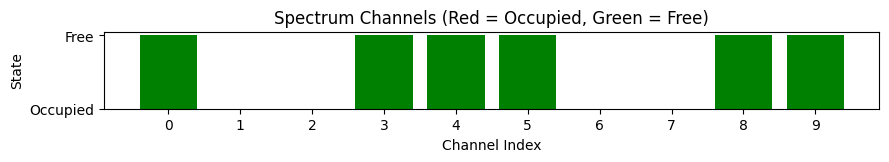

Step: 6, Action: 5, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 4}


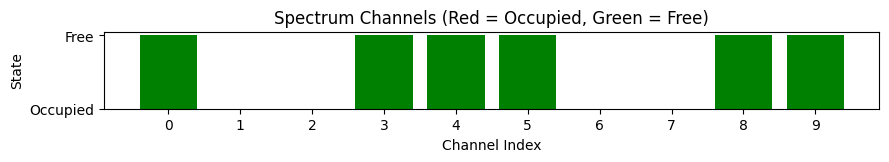

Step: 7, Action: 7, Reward: -3.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 3}


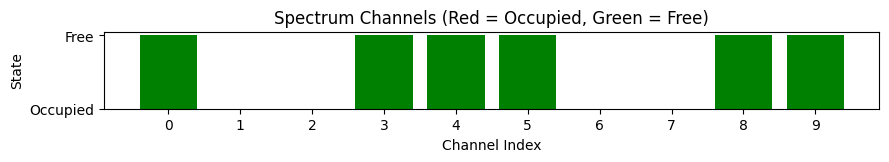

Step: 8, Action: 5, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 2}


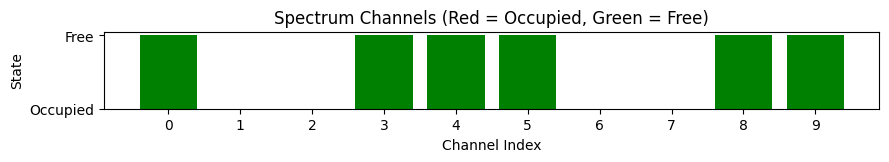

Step: 9, Action: 3, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 1}


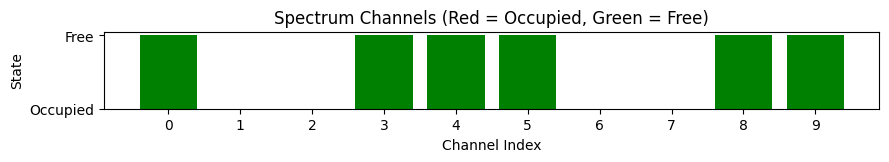

Step: 10, Action: 8, Reward: 9.0, Info: {'energy_consumed': 1.0, 'steps_remaining': 0}


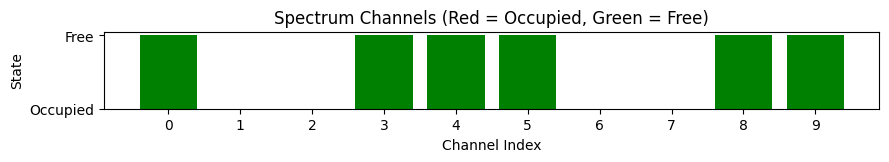

Total Reward: 54.0


In [55]:
import numpy as np
import matplotlib.pyplot as plt

class SpectrumEnv:
    def __init__(self, num_channels=10, max_steps=50):
        """
        Custom environment for spectrum hole detection without external libraries.
        :param num_channels: Number of spectrum channels to monitor.
        :param max_steps: Maximum steps per episode.
        """
        self.num_channels = num_channels
        self.max_steps = max_steps
        
        # Energy cost parameters
        self.energy_per_action = 1.0  # Energy consumed per sensing action
        self.penalty_for_wrong_detection = 2.0  # Penalty for selecting an occupied channel
        
        # Reward configuration
        self.reward_for_detection = 10.0  # Reward for correctly detecting a free channel
        
        # Internal state variables
        self.state = None
        self.current_step = 0
        self.done = False
    
    def reset(self):
        """
        Reset the environment to its initial state.
        """
        self.state = np.random.choice([0, 1], size=(self.num_channels,), p=[0.5, 0.5])
        self.current_step = 0
        self.done = False
        return self.state
    
    def step(self, action):
        """
        Execute an action in the environment.
        :param action: The channel chosen for sensing (integer index).
        :return: observation (state), reward, done, info
        """
        if self.done:
            raise ValueError("Episode has ended. Please reset the environment.")
        
        # Increment step count
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.done = True
        
        # Calculate reward
        if self.state[action] == 1:  # Correct detection
            reward = self.reward_for_detection - self.energy_per_action
        else:  # Incorrect detection
            reward = -self.penalty_for_wrong_detection - self.energy_per_action
        
        # Info dictionary
        info = {
            "energy_consumed": self.energy_per_action,
            "steps_remaining": self.max_steps - self.current_step
        }
        
        return self.state, reward, self.done, info
    
    def render(self):
        """
        Render the environment by displaying the state of channels.
        """
        plt.figure(figsize=(10, 1))
        plt.clf()
        plt.bar(range(self.num_channels), self.state, color=['red' if x == 0 else 'green' for x in self.state])
        plt.title("Spectrum Channels (Red = Occupied, Green = Free)")
        plt.xlabel("Channel Index")
        plt.ylabel("State")
        plt.xticks(range(self.num_channels))
        plt.yticks([0, 1], ["Occupied", "Free"])
        plt.show()

# Example usage
if __name__ == "__main__":
    # Initialize environment
    env = SpectrumEnv(num_channels=10, max_steps=10)
    
    # Reset the environment
    state = env.reset()
    env.render()
    
    total_reward = 0
    while not env.done:
        # Random action selection
        action = np.random.randint(0, env.num_channels)
        state, reward, done, info = env.step(action)
        print(f"Step: {env.current_step}, Action: {action}, Reward: {reward}, Info: {info}")
        total_reward += reward
        env.render()
    
    print(f"Total Reward: {total_reward}")
